In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from astropy import units as u
from astropy import coordinates as coords
from astroquery.simbad import Simbad
import astroquery
plt.style.use("fivethirtyeight")

In [5]:
import gwb

In [6]:
tgas = gwb.TGASData("/Users/semyeong/data/gaia/tgas_source/stacked_tgas.fits")

In [7]:
df = pd.read_csv("../data/targets.csv")
print(len(df))

45


In [8]:
df.head(3)

,tgas_row,tgas_ra,tgas_dec,tgas_distance,gx,gy,gz,tgas_glon,tgas_glat,tgas_gmag,hip,tyc,hip_tyc_id,source_id,tmass_j
0,382720,204.863461,61.061727,102.407820,-22.697253,53.998667,84.002025,112.798467,55.111792,11.724152,NaN,b'4164-274-1',TYC 4164-274-1,1662855584317183744,10.187
1,357377,210.589752,52.417741,94.271430,-7.874400,44.365174,82.805964,100.064644,61.447334,10.153631,NaN,b'3471-333-1',TYC 3471-333-1,1512773174838690176,9.033
2,368772,223.270036,51.261152,102.577721,2.282405,56.244648,85.752662,87.676213,56.717754,9.766224,NaN,b'3480-1209-1',TYC 3480-1209-1,1593570580647402880,8.797


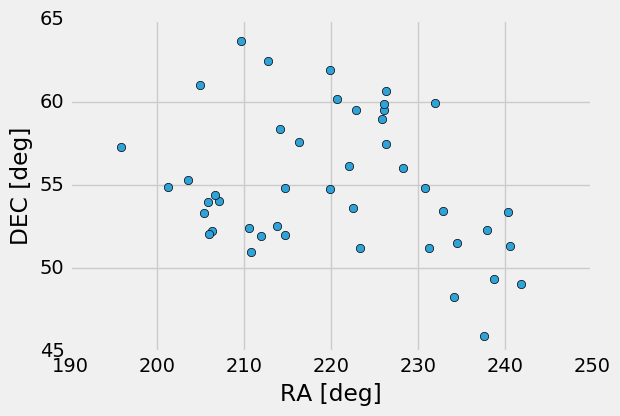

In [9]:
plt.plot(df.tgas_ra, df.tgas_dec, 'o');
plt.xlabel("RA [deg]");
plt.ylabel("DEC [deg]");

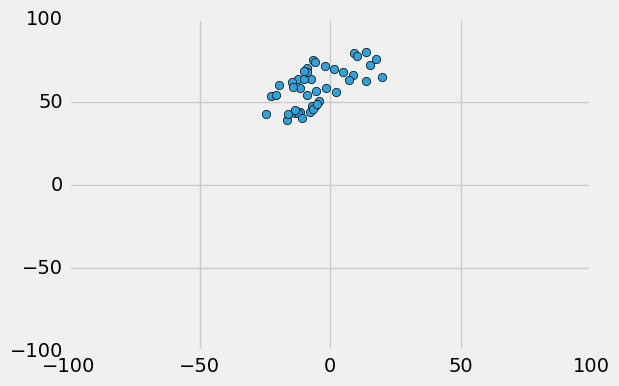

In [10]:
plt.plot(df.gx, df.gy, 'o');
# plt.xlabel("GLON [deg]");
# plt.ylabel("GLAT [deg]");
plt.xlim(-100,100);
plt.ylim(-100,100);

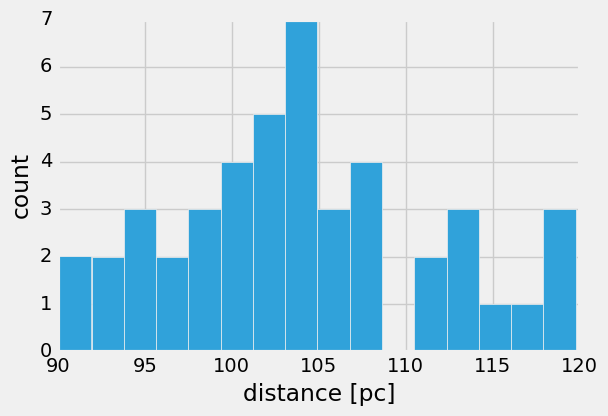

In [11]:
plt.hist(df.tgas_distance, 16);
plt.xlabel("distance [pc]");
plt.ylabel("count")

In [12]:
customSimbad = Simbad()
customSimbad.add_votable_fields('sptype')
customSimbad.add_votable_fields('orv')
customSimbad.add_votable_fields('bibcodelist(1850-2017)')

In [13]:
for field in ['rv_value', 'rvel', 'gcrv', 'orv']:
    customSimbad.get_field_description(field)

Radial velocity value. Eventually translated from a redshift
Radial velocities of galaxies
General Catalogue of Radial Velocities
oRV stellar radial velocities (will shortly replace 
              the GCRV measurements.


In [14]:
result = customSimbad.query_objects(df.hip_tyc_id)

In [15]:
result['MAIN_ID', 'oRV_RVel',
 'oRV_Q',
 'oRV_Nmes',
 'oRV_Rem',
 'oRV_Orig',
 'oRV_Dis',
 'oRV_bibcode',]

MAIN_ID,oRV_RVel,oRV_Q,oRV_Nmes,oRV_Rem,oRV_Orig,oRV_Dis,oRV_bibcode
,km / s,,,,,a / mm,
object,float32,str1,int32,object,str2,int32,str19
TYC 4164-274-1,--,,0,,,0,
TYC 3471-333-1,--,,0,,,0,
BD+51 1966,--,,0,,,0,
HR 5345,-15.0,C,4,,##,0,1953GCRV..C......0W
TYC 3489-1148-1,--,,0,,,0,
TYC 3470-485-1,--,,0,,,0,
HD 234061,--,,0,,,0,
TYC 3868-177-1,--,,0,,,0,


In [16]:
result.sort('BIBLIST_1850_2017')
result['MAIN_ID', 'SP_TYPE', 'BIBLIST_1850_2017']

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


MAIN_ID,SP_TYPE,BIBLIST_1850_2017
object,object,int32
TYC 4164-274-1,,0
TYC 3851-600-1,,0
TYC 3867-1373-1,,0
TYC 3861-1374-1,,0
TYC 4173-609-1,,0
TYC 4174-1117-1,,0
HD 238351,G0,0
TYC 3877-725-1,,0
TYC 3860-1483-1,,0


In [127]:
import sys
sys.path.append('../../gaia-wide-binaries/notebooks/')
import tap

class SimbadTAP(tap.TAP_Service):
    def __init__(self, *args, **kwargs):
        host = "simbad.u-strasbg.fr"
        port = 80
        path = "/simbad/sim-tap"
        tap.TAP_Service.__init__(self, host, path, port, *args, **kwargs)

In [18]:
query_template = """
SELECT BIBCode,
       Journal,
       Title,
       Year,
       Volume,
       DOI
FROM ref JOIN has_ref ON oidbibref = oidbib JOIN ident ON has_ref.oidref = ident.oidref
WHERE id = '{}'
ORDER BY Year DESC;
"""

In [128]:
mytap = SimbadTAP()

In [20]:
mytap.get_table_info('ref')

oidbib,bibcode,year,journal,page,last_page,volume,title,doi,nbobject
int64,object,int16,object,int32,int32,int32,object,object,int32


In [21]:
import time

In [22]:
biblist = []
for iden in result['MAIN_ID']:
    print('searching for {}'.format(iden.decode()))
    biblist.append(mytap.query(query_template.format(iden.decode())))
    time.sleep(5)  ## seems that I'm violating some rate limit or something

searching for TYC 4164-274-1
searching for TYC 3851-600-1
searching for TYC 3867-1373-1
searching for TYC 3861-1374-1
searching for TYC 4173-609-1
searching for TYC 4174-1117-1
searching for HD 238351
searching for TYC 3877-725-1
searching for TYC 3860-1483-1
searching for TYC 3486-1405-1
searching for TYC 3471-233-1
searching for TYC 4180-573-1
searching for TYC 3869-656-1
searching for HD 234065
searching for TYC 3496-1082-1
searching for HD 238423
searching for TYC 3868-177-1
searching for HD 234061
searching for TYC 3470-485-1
searching for TYC 3489-1148-1
searching for TYC 3497-1053-1
searching for BD+51  1966
searching for TYC 3471-333-1
searching for TYC 3490-1083-1
searching for TYC 3875-762-1
searching for BD+60  1587
searching for BD+49  2434
searching for HD 113491
searching for BD+56  1762
searching for HD 125259
searching for HD 137589
searching for TYC 3867-2-1
searching for HD 135501
searching for NAME Stella Ludoviciana
searching for HD 145145
searching for HD 133909
se

In [23]:
# add which object's reference it is
for i, t in enumerate(biblist):
    t['hip_tyc_id'] = [df.hip_tyc_id[i] for j in range(len(t))]

In [32]:
from astropy import table

In [24]:
dfBib = pd.concat([t.to_pandas() for t in biblist])

In [40]:
print("total number of refs = {:d}".format(len(dfBib)))
print("total number of unique refs = {:d}".format(dfBib.bibcode.unique().size))
print("number of stars with refs = {:d} / {:d}".format(
        df.hip_tyc_id.size - dfBib.hip_tyc_id.unique().size, df.hip_tyc_id.size))

total number of refs = 389
total number of unique refs = 230
number of stars with refs = 25 / 45


In [30]:
dfBib.index = range(len(dfBib))  # re-index

In [32]:
dfBib.to_csv("../data/target_bib.csv", index=False)

In [45]:
df.columns

Index(['tgas_row', 'tgas_ra', 'tgas_dec', 'tgas_distance', 'gx', 'gy', 'gz',
       'tgas_glon', 'tgas_glat', 'tgas_gmag', 'hip', 'tyc', 'hip_tyc_id',
       'source_id', 'tmass_j'],
      dtype='object')

In [112]:
from astropy import table
table.Table({"title":dfBib[['hip_tyc_id', 'title', 'bibcode']]}).show_in_browser(jsviewer=True)

In [37]:
dfBib.hip_tyc_id.unique()

,bibcode,journal,title,year,volume,doi,hip_tyc_id
0,b'2009ApJS..181..444A',b'ApJS',b'X-ray-emitting stars identified from the ROS...,2009.0,181.0,b'10.1088/0067-0049/181/2/444',TYC 3850-257-1
1,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 63702
2,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',HIP 63702
3,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',TYC 4180-573-1
4,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',TYC 4180-573-1
5,b'1997PNAOJ...5....1Y',b'PNAOJ',b'The Tokyo PMC Catalog 90-93: Catalog of posi...,1997.0,5.0,b'',TYC 4180-573-1
6,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 66198
7,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',HIP 66198
8,b'2011MNRAS.411..435B',b'MNRAS',b'Bayesian inference of stellar parameters and...,2011.0,411.0,b'10.1111/j.1365-2966.2010.17699.x',HIP 66198
9,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 69275


In [47]:
import numpy as np

In [56]:
df['gj'] = df['tgas_gmag'] - df['tmass_j']
df['gMag'] = df['tgas_gmag'] - 5*(np.log10(df['tgas_distance'])-1)

In [162]:
from astropy.table import Table

In [168]:
parsec_2MASS = Table.read("../data/parsec_2MASSJHKs.dat",
                    format='ascii.commented_header', header_start=5)
parsec_Gaia = Table.read("../data/parsec_Gaia.dat",
                    format='ascii.commented_header', header_start=5)

In [170]:
print(len(parsec_2MASS), len(parsec_Gaia))

29427 29427


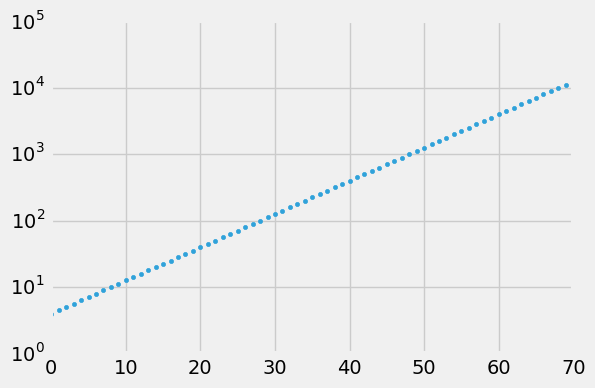

In [182]:
plt.plot(np.unique(parsec_2MASS['Age'])/1e6, '.')
plt.yscale('log')

In [187]:
ages = np.unique(parsec_2MASS['Age'])
print(len(ages))

71


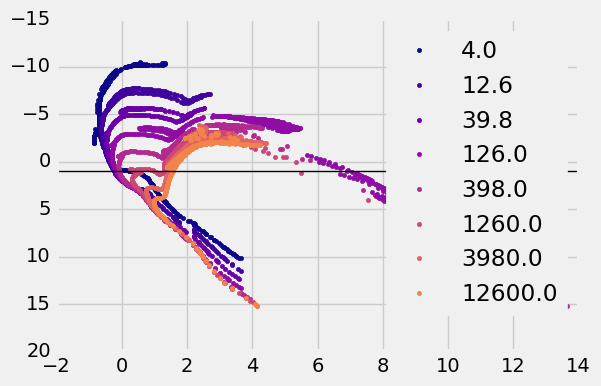

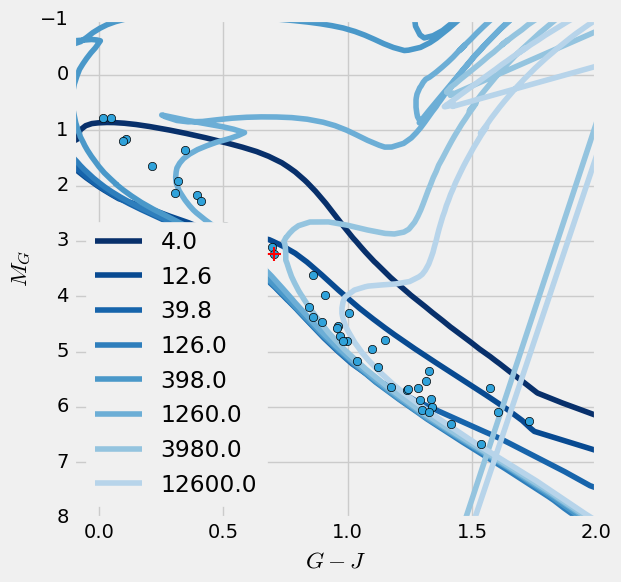

In [213]:
plt.figure(figsize=(6,6))

parsec_gj = parsec_Gaia['Gmag'] - parsec_2MASS['Jmag']
for i, age in enumerate(ages[::10]):
    cond = parsec_2MASS['Age']==age
    plt.plot(parsec_gj[cond], parsec_Gaia['Gmag'][cond], '-', color=plt.cm.Blues_r(i/10.),
             label='{:.1f}'.format(age/1e6))
#     plt.plot(parsec_gj[cond], parsec_2MASS['Jmag'][cond], '.', color=plt.cm.plasma(i/10.))

plt.legend(loc='lower left', numpoints=1)

plt.plot(df['gj'], df['gMag'], 'o')
plt.gca().invert_yaxis()
plt.xlabel('$G-J$')
plt.ylabel('$M_G$')
plt.xlim(-0.1,2)
plt.ylim(8,-1)
# for row in df.itertuples():
#     plt.text(row.gj, row.gMag, row.hip_tyc_id, rotation=45,
#              ha='left' if row.Index%2==0 else 'right',
#              va='bottom' if row.Index%2==0 else 'top')

select = df.loc[df.hip_tyc_id == 'HIP 69721']
plt.plot(select.gj, select.gMag, 'r+', ms=10, mew=1.5)

In [72]:
import sys
sys.path.append("../groupten/")

In [73]:
import read_mist_models

In [77]:
isocmd = read_mist_models.ISOCMD('../data/MIST_iso_1490194647.iso.cmd')

Reading in: ../data/MIST_iso_1490194647.iso.cmd


In [80]:
print('available columns: ', isocmd.hdr_list)

available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G', 'Gaia_BP', 'Gaia_RP', 'phase']


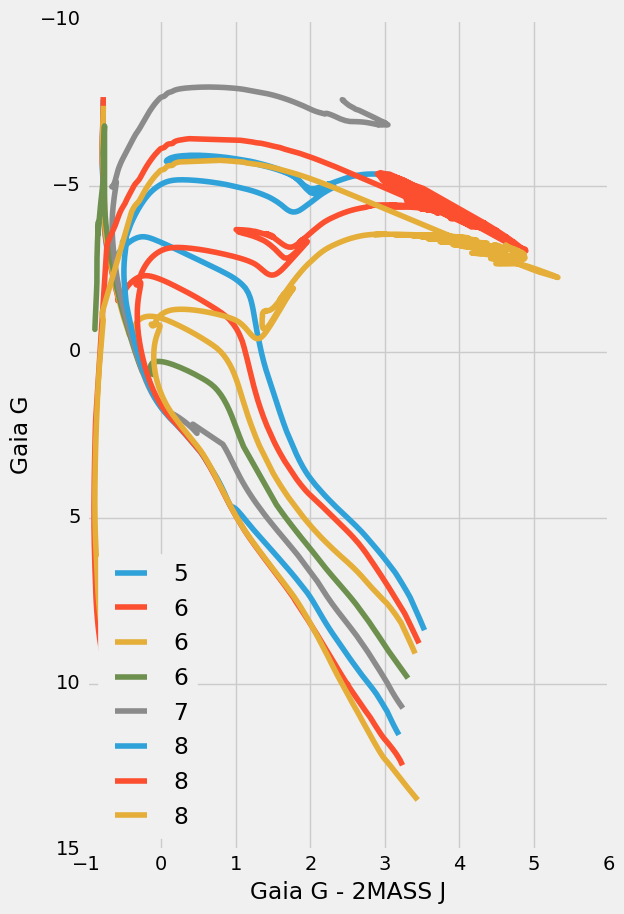

In [217]:
def plot_gjg(age):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    B = isocmd.isocmds[age_ind]['Gaia_G']
    V = isocmd.isocmds[age_ind]['2MASS_J']
    plt.plot(B-V, B, label='{:.0f}'.format(age))

plt.figure(figsize=(6,10))
plt.xlabel('Gaia G - 2MASS J')
plt.ylabel('Gaia G')
# plt.axis([-2.0, 6.0, 18, -10])
plt.gca().invert_yaxis()
for age in np.arange(5,9,.5):
    plot_gjg(age)
plt.legend(loc='lower left')

In [110]:
dfBib.loc[dfBib.hip_tyc_id == 'HIP 67005']

,bibcode,journal,title,year,volume,doi,hip_tyc_id
205,b'2015ApJ...804..146D',b'ApJ',b'The ages of early-type stars: Stromgren phot...,2015.0,804.0,b'10.1088/0004-637X/804/2/146',HIP 67005
206,b'2015A&A...580A..23P',b'A&A',b'A new catalogue of Stroemgren-Crawford uvby{...,2015.0,580.0,b'10.1051/0004-6361/201526413',HIP 67005
207,b'2013ApJ...775..115U',b'ApJ',b'The inner kiloparsec of Mrk 273 with Keck ad...,2013.0,775.0,b'10.1088/0004-637X/775/2/115',HIP 67005
208,b'2012AstL...38..694G',b'AstL',b'Spatial distribution and kinematics of OB st...,2012.0,38.0,b'10.1134/S1063773712110035',HIP 67005
209,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 67005
210,b'2012A&A...537A.120Z',b'A&A',b'Rotational velocities of A-type stars. IV. E...,2012.0,537.0,b'10.1051/0004-6361/201117691',HIP 67005
211,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',HIP 67005
212,b'2011SerAJ.182...35D',b'SerAJ',b'Corrected {mu}delta for stars of Hipparcos c...,2011.0,182.0,b'10.2298/SAJ1182035D',HIP 67005
213,b'2011ApJS..197...19K',b'ApJS',b'The first hundred brown dwarfs discovered by...,2011.0,197.0,b'10.1088/0067-0049/197/2/19',HIP 67005
214,b'2009ApJS..185..289R',b'ApJS',b'The infrared telescope facility (IRTF) spect...,2009.0,185.0,b'10.1088/0067-0049/185/2/289',HIP 67005


mean position gx, gy, gz = -5.2 59.0 84.1
mean distance = 103.9


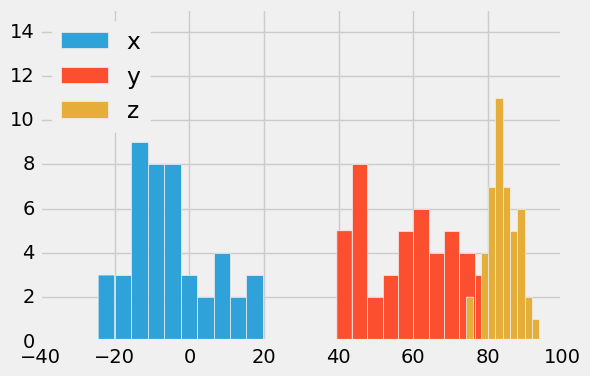

In [125]:
plt.hist(df.gx, label='x');
plt.hist(df.gy, label='y');
plt.hist(df.gz, label='z');
plt.legend(loc='upper left',);
plt.ylim(0,15)
print("mean position gx, gy, gz = {:.1f} {:.1f} {:.1f}".format(
    df.gx.mean(), df.gy.mean(), df.gz.mean()))
print("mean distance = {:.1f}".format(
    np.sqrt(df.gx**2+df.gy**2+df.gz**2).mean()))

In [126]:
dfBib

,bibcode,journal,title,year,volume,doi,hip_tyc_id
0,b'2009ApJS..181..444A',b'ApJS',b'X-ray-emitting stars identified from the ROS...,2009.0,181.0,b'10.1088/0067-0049/181/2/444',TYC 3850-257-1
1,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 63702
2,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',HIP 63702
3,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',TYC 4180-573-1
4,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',TYC 4180-573-1
5,b'1997PNAOJ...5....1Y',b'PNAOJ',b'The Tokyo PMC Catalog 90-93: Catalog of posi...,1997.0,5.0,b'',TYC 4180-573-1
6,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 66198
7,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',HIP 66198
8,b'2011MNRAS.411..435B',b'MNRAS',b'Bayesian inference of stellar parameters and...,2011.0,411.0,b'10.1111/j.1365-2966.2010.17699.x',HIP 66198
9,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 69275


In [133]:
simbad_tap_tablelist = mytap.get_table_list()
simbad_tap_tablelist[:3]

description,schema_name,table_name,table_type,utype
object,object,object,object,object
General data about an astronomical object,public,basic,table,
List of all object types associated with an object,public,otypes,table,
all names concatenated with pipe,public,ids,view,


In [139]:
simbad_tap_tablelist[simbad_tap_tablelist['table_name']==b'ident']

description,schema_name,table_name,table_type,utype
object,object,object,object,object
Identifiers of an astronomical object,public,ident,table,


In [142]:
mytap.get_table_info('ident')

id,oidref
object,int64


In [144]:
def query_identifiers(idstring):
    query = """
    -- Display all identifiers of a given object.
    SELECT id2.id
    FROM ident AS id1 JOIN ident AS id2 USING(oidref)
    WHERE id1.id = '{}';
    """.format(idstring)
    return mytap.query(query)

In [146]:
query_identifiers("80 Uma")

id
object
1RXS J132513.8+545920
2RXP J132513.9+545914
** SHY 248C
** PSF 1
NAME Alcor
PLX 3066
* 80 UMa
* g UMa
AG+55 887
